In [1]:
#library packages
library(fpp2)
library(forecast)
library(TSEntropies)
library(ggplot2)


Loading required package: ggplot2
Loading required package: forecast
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Loading required package: fma
Loading required package: expsmooth


In [2]:
#import dataset 
data=read.csv('tenyearclean.csv')
ts_data=ts(data[-1],start=c(2008,1),frequency = 12)

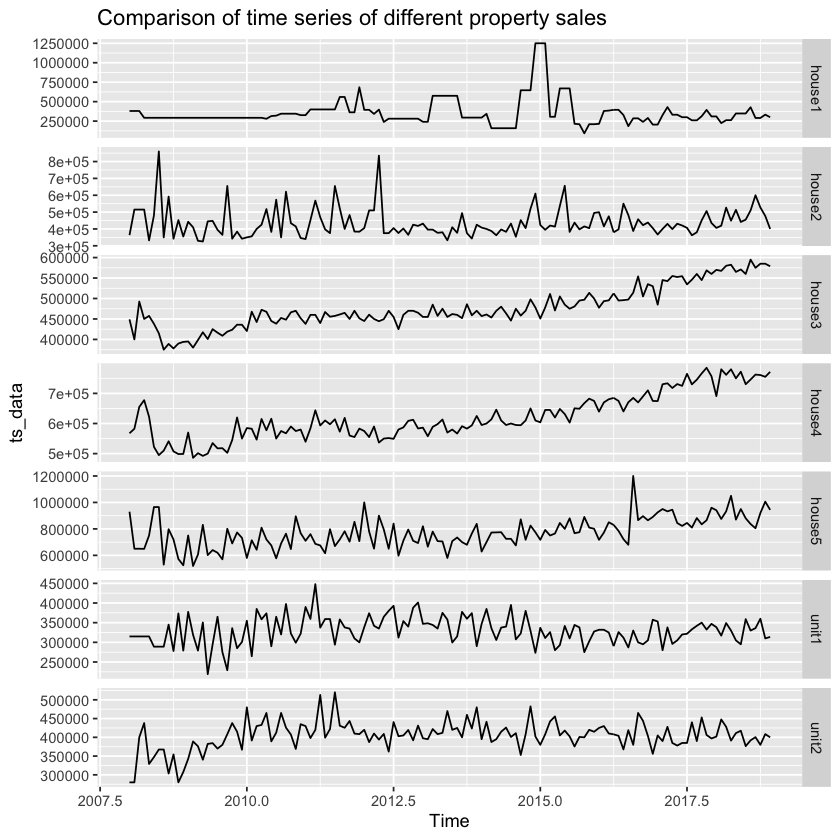

In [3]:
#plot dataset 
autoplot(ts_data,facets=T)+ggtitle("Comparison of time series of different property sales")

In [4]:
#so from the cluster we can see that unit 1 and unit 2 are similar,
#house3, house4, house5 are similar
#house1, house2 are similar
#we can choose unit 1, house 3 house 1 and house 5 as representative 
#general trend of the four time series
unit1=ts(data$unit1,start=c(2008,1),frequency = 12)
house3=ts(data$house3,start=c(2008,1),frequency = 12)
house2=ts(data$house2,start=c(2008,1),frequency = 12)
house5=ts(data$house5,start=c(2008,1),frequency = 12)

In [5]:
#check if there is outliers
tsoutliers(unit1)
tsoutliers(house2)
tsoutliers(house3)
tsoutliers(house5)
house2=tsclean(house2,replace.missing = F,lambda = NULL)
house5=tsclean(house5,replace.missing = F,lambda = NULL)

$index
integer(0)

$replacements
numeric(0)

$index
[1]  7 52

$replacements
[1] 441148.1 429501.5

$index
integer(0)

$replacements
integer(0)

$index
[1] 104

$replacements
[1] 726319.2

In [6]:
# new dataset 
repre_data=cbind(unit1,house2,house3,house5)

# Unit 1 

## General Trend

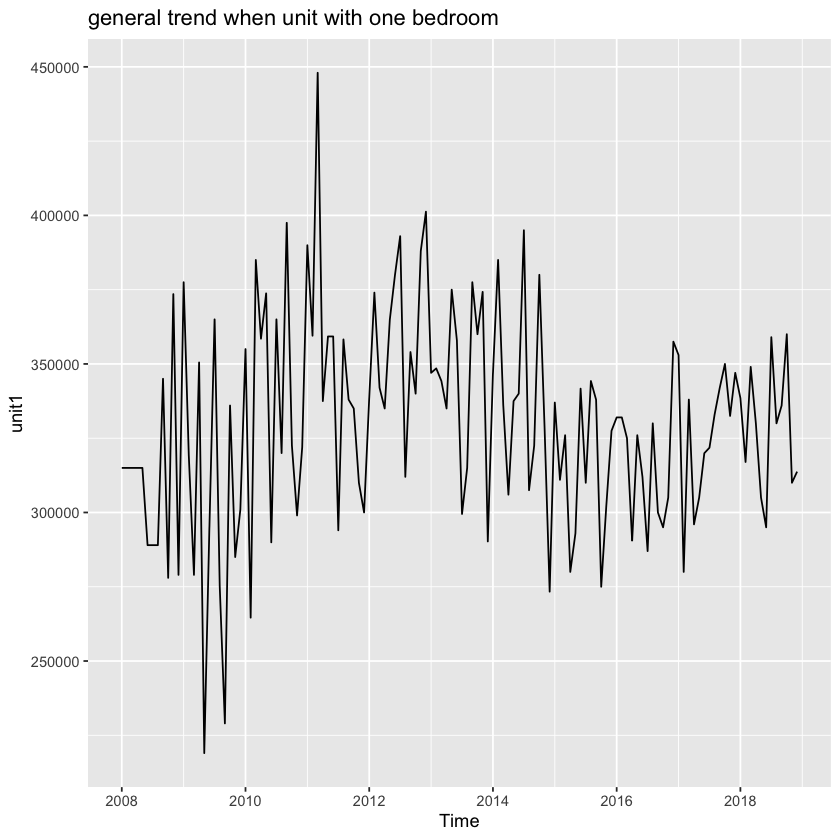

In [7]:
# general trend and seasonality 
autoplot(unit1)+ggtitle('general trend when unit with one bedroom')

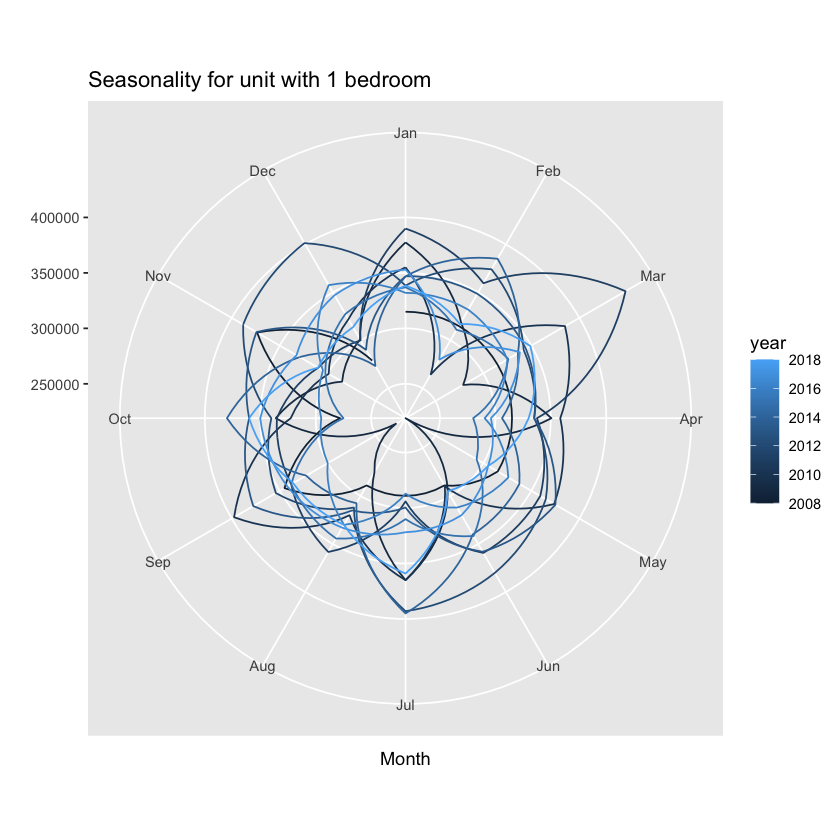

In [8]:
#seasonality
#unit1
ggseasonplot(unit1, year.labels=FALSE, continuous=TRUE, polar = TRUE)+
  ggtitle("Seasonality for unit with 1 bedroom")

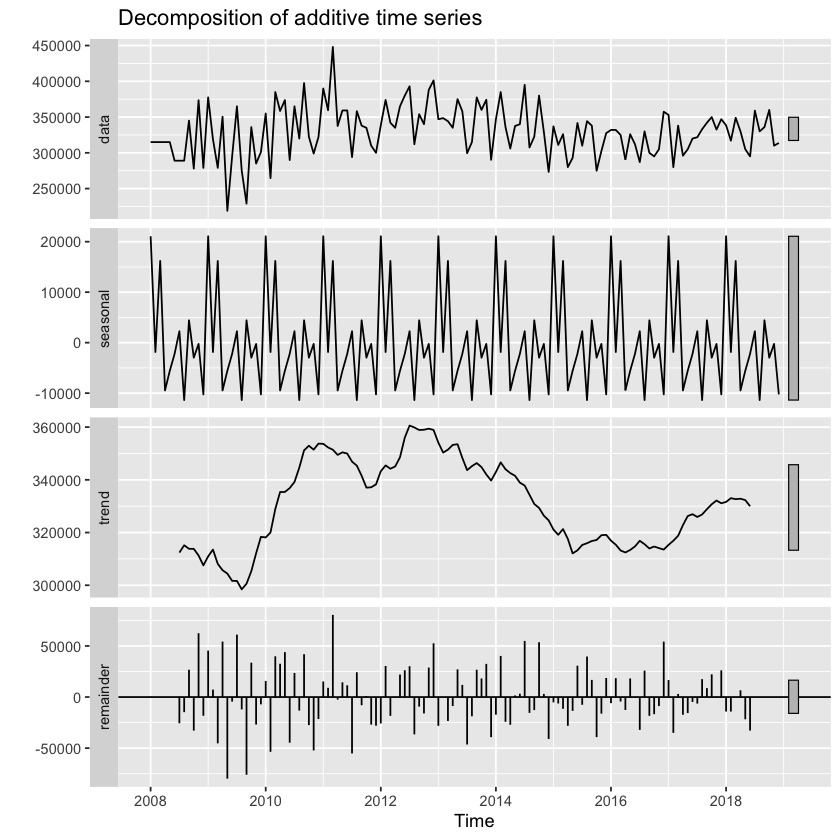

In [15]:
cla_unit1=decompose(unit1) 
autoplot(cla_unit1)
unit1_trend=var(cla_unit1$trend,na.rm = TRUE)
unit1_random=var(cla_unit1$random,na.rm = TRUE)

FT_unit1=1-(unit1_random/var((cla_unit1$trend+unit1_random),na.rm = TRUE))
FS_unit1=1-(unit1_random/var((cla_unit1$seasonal+unit1_random),na.rm = TRUE))

In [16]:
#sample entropy
SampEn(unit1)

[1] 2.406126

In [17]:
#split train and test 
#we do think we need transformation
#reason 1 stablize the variance
#reason 2 keep prediction over 0
#we try to use more observations to train the model so we only use one year
#as test set 
unit1=log(unit1)
unit1_train=window(unit1,end=end(unit1)-c(1,0))

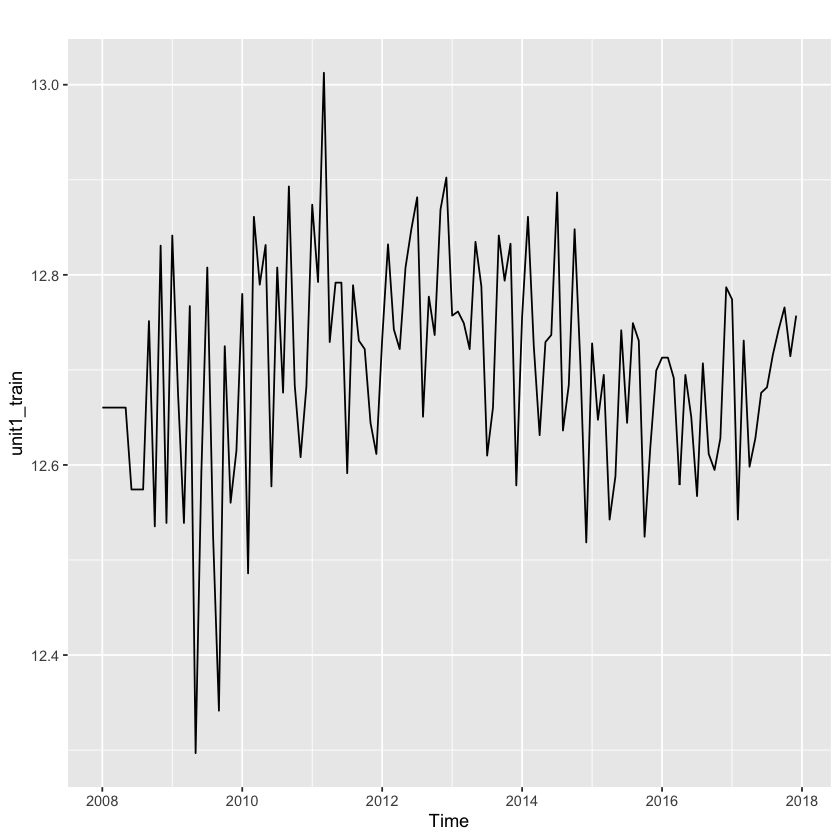

In [18]:
autoplot(unit1_train)

In [19]:
#best ets for unit 1
#best ets for unit 1 is ann which make sense 

best.ets.unit1=ets(unit1_train)
best.ets.unit1

ETS(A,N,N) 

Call:
 ets(y = unit1_train) 

  Smoothing parameters:
    alpha = 0.1141 

  Initial states:
    l = 12.6458 

  sigma:  0.1097

     AIC     AICc      BIC 
48.11131 48.31820 56.47378 

In [20]:
#auto arima
#best arima for unit 1 is arima(1,0,2) but the ma2 not so significant 
#so we try to force arima(1,0,1) here 
best.arima.unit1=auto.arima(unit1_train,trace=T,stepwise = F)
best.arima.unit1


 ARIMA(0,0,0)            with zero mean     : 952.5801
 ARIMA(0,0,0)            with non-zero mean : -178.9283
 ARIMA(0,0,0)(0,0,1)[12] with zero mean     : Inf
 ARIMA(0,0,0)(0,0,1)[12] with non-zero mean : -177.1421
 ARIMA(0,0,0)(0,0,2)[12] with zero mean     : Inf
 ARIMA(0,0,0)(0,0,2)[12] with non-zero mean : -175.2241
 ARIMA(0,0,0)(1,0,0)[12] with zero mean     : Inf
 ARIMA(0,0,0)(1,0,0)[12] with non-zero mean : -177.1212
 ARIMA(0,0,0)(1,0,1)[12] with zero mean     : Inf
 ARIMA(0,0,0)(1,0,1)[12] with non-zero mean : -175.0223
 ARIMA(0,0,0)(1,0,2)[12] with zero mean     : Inf
 ARIMA(0,0,0)(1,0,2)[12] with non-zero mean : Inf
 ARIMA(0,0,0)(2,0,0)[12] with zero mean     : Inf
 ARIMA(0,0,0)(2,0,0)[12] with non-zero mean : -175.2355
 ARIMA(0,0,0)(2,0,1)[12] with zero mean     : Inf
 ARIMA(0,0,0)(2,0,1)[12] with non-zero mean : -176.5898
 ARIMA(0,0,0)(2,0,2)[12] with zero mean     : Inf
 ARIMA(0,0,0)(2,0,2)[12] with non-zero mean : Inf
 ARIMA(0,0,1)            with zero mean     : Inf
 A

Series: unit1_train 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
         ar1      ma1     ma2     mean
      0.9241  -0.9626  0.1655  12.6983
s.e.  0.0618   0.1099  0.1022   0.0245

sigma^2 estimated as 0.01177:  log likelihood=98.13
AIC=-186.26   AICc=-185.74   BIC=-172.33

In [21]:
arima.unit1.101=arima(unit1_train,order=c(1,0,1))
arima.unit1.101


Call:
arima(x = unit1_train, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.9432  -0.8437    12.6966
s.e.  0.0469   0.0687     0.0253

sigma^2 estimated as 0.01163:  log likelihood = 96.83,  aic = -185.66

In [22]:
#we check the accuracy of three model 
accuracy(forecast(best.ets.unit1),unit1)
accuracy(forecast(best.arima.unit1),unit1)
accuracy(forecast(arima.unit1.101),unit1)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.003782212,0.10879585,0.08386253,0.02290298,0.6607568,0.7397083,-0.1073142,NA
Test set,0.003108989,0.06143289,0.05276942,0.02214546,0.4154227,0.4654520,-0.1091708,0.6742555


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.001816946,0.10664645,0.08254281,0.007230793,0.6505017,0.7280677,0.01225683,NA
Test set,-0.007662184,0.06213201,0.05205080,-0.062673363,0.4101094,0.4591134,-0.11111427,0.6853276


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.0021770335,0.10785296,0.08387842,0.009896361,0.6610901,0.7398484,-0.1103804,NA
Test set,-0.0007085592,0.06131055,0.05198544,-0.007910809,0.4093700,0.4585369,-0.1079224,0.6755176



	Ljung-Box test

data:  Residuals from ETS(A,N,N)
Q* = 18.408, df = 22, p-value = 0.6816

Model df: 2.   Total lags used: 24



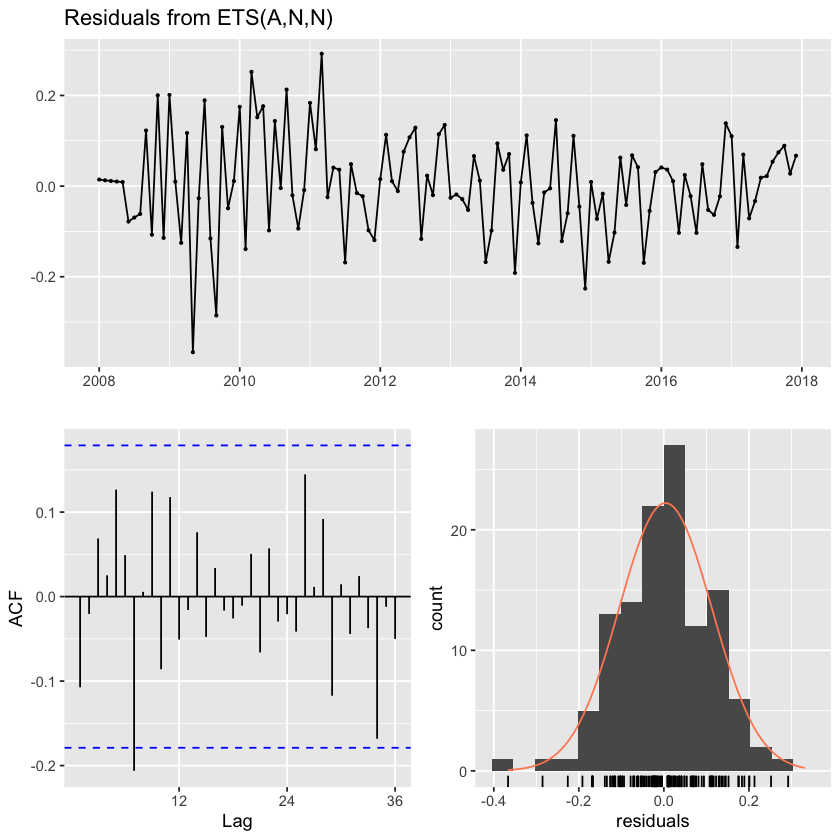


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2) with non-zero mean
Q* = 16.697, df = 20, p-value = 0.6726

Model df: 4.   Total lags used: 24



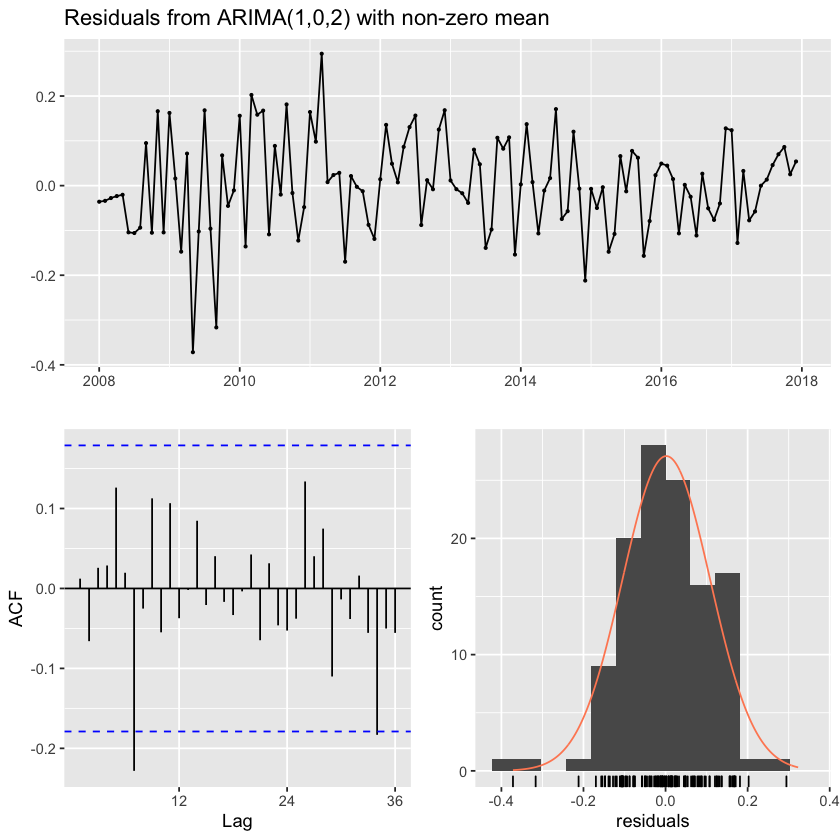


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1) with non-zero mean
Q* = 19.845, df = 21, p-value = 0.5311

Model df: 3.   Total lags used: 24



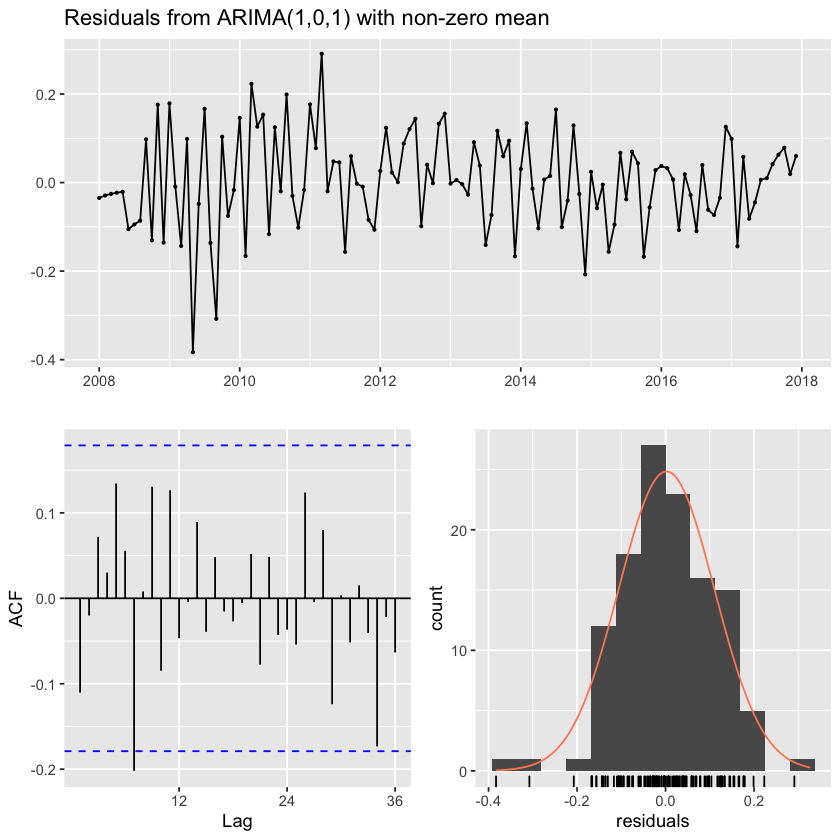

In [23]:
#check residual
#all the residuals are independent 
checkresiduals(best.ets.unit1)
checkresiduals(best.arima.unit1)
checkresiduals(arima.unit1.101)

In [24]:
#forecast
#we do find arima.unit1.101 have smaller interval 
forecast(best.ets.unit1)
forecast(best.arima.unit1)
forecast(arima.unit1.101)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018       12.69762 12.55702 12.83822 12.48258 12.91265
Feb 2018       12.69762 12.55610 12.83914 12.48119 12.91405
Mar 2018       12.69762 12.55520 12.84004 12.47980 12.91543
Apr 2018       12.69762 12.55430 12.84094 12.47843 12.91681
May 2018       12.69762 12.55340 12.84184 12.47706 12.91818
Jun 2018       12.69762 12.55251 12.84273 12.47570 12.91954
Jul 2018       12.69762 12.55163 12.84361 12.47435 12.92089
Aug 2018       12.69762 12.55075 12.84449 12.47300 12.92223
Sep 2018       12.69762 12.54988 12.84536 12.47167 12.92357
Oct 2018       12.69762 12.54901 12.84623 12.47034 12.92490
Nov 2018       12.69762 12.54815 12.84709 12.46902 12.92622
Dec 2018       12.69762 12.54729 12.84795 12.46771 12.92753
Jan 2019       12.69762 12.54644 12.84880 12.46640 12.92883
Feb 2019       12.69762 12.54559 12.84965 12.46511 12.93013
Mar 2019       12.69762 12.54474 12.85049 12.46382 12.93142
Apr 2019       12.69762 12.54391 12.8513

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018       12.70486 12.56585 12.84387 12.49226 12.91745
Feb 2018       12.71329 12.57418 12.85240 12.50053 12.92604
Mar 2018       12.71215 12.57187 12.85243 12.49761 12.92669
Apr 2018       12.71110 12.56983 12.85236 12.49504 12.92715
May 2018       12.71012 12.56801 12.85223 12.49279 12.92746
Jun 2018       12.70922 12.56640 12.85205 12.49080 12.92765
Jul 2018       12.70839 12.56497 12.85182 12.48904 12.92775
Aug 2018       12.70763 12.56368 12.85157 12.48748 12.92777
Sep 2018       12.70692 12.56253 12.85130 12.48610 12.92773
Oct 2018       12.70626 12.56151 12.85102 12.48488 12.92765
Nov 2018       12.70566 12.56058 12.85073 12.48378 12.92753
Dec 2018       12.70510 12.55975 12.85044 12.48281 12.92738
Jan 2019       12.70458 12.55900 12.85016 12.48194 12.92722
Feb 2019       12.70410 12.55833 12.84987 12.48116 12.92704
Mar 2019       12.70366 12.55772 12.84960 12.48046 12.92686
Apr 2019       12.70325 12.55716 12.8493

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018       12.70314 12.56492 12.84136 12.49175 12.91453
Feb 2018       12.70277 12.56387 12.84167 12.49034 12.91520
Mar 2018       12.70242 12.56291 12.84193 12.48906 12.91578
Apr 2018       12.70209 12.56204 12.84213 12.48791 12.91627
May 2018       12.70178 12.56126 12.84229 12.48687 12.91668
Jun 2018       12.70148 12.56054 12.84242 12.48593 12.91703
Jul 2018       12.70120 12.55989 12.84252 12.48508 12.91732
Aug 2018       12.70094 12.55930 12.84259 12.48431 12.91757
Sep 2018       12.70069 12.55875 12.84263 12.48361 12.91777
Oct 2018       12.70046 12.55826 12.84266 12.48298 12.91794
Nov 2018       12.70024 12.55781 12.84267 12.48241 12.91807
Dec 2018       12.70003 12.55739 12.84267 12.48188 12.91818
Jan 2019       12.69984 12.55701 12.84266 12.48141 12.91827
Feb 2019       12.69965 12.55667 12.84264 12.48097 12.91833
Mar 2019       12.69948 12.55635 12.84261 12.48058 12.91838
Apr 2019       12.69931 12.55605 12.8425

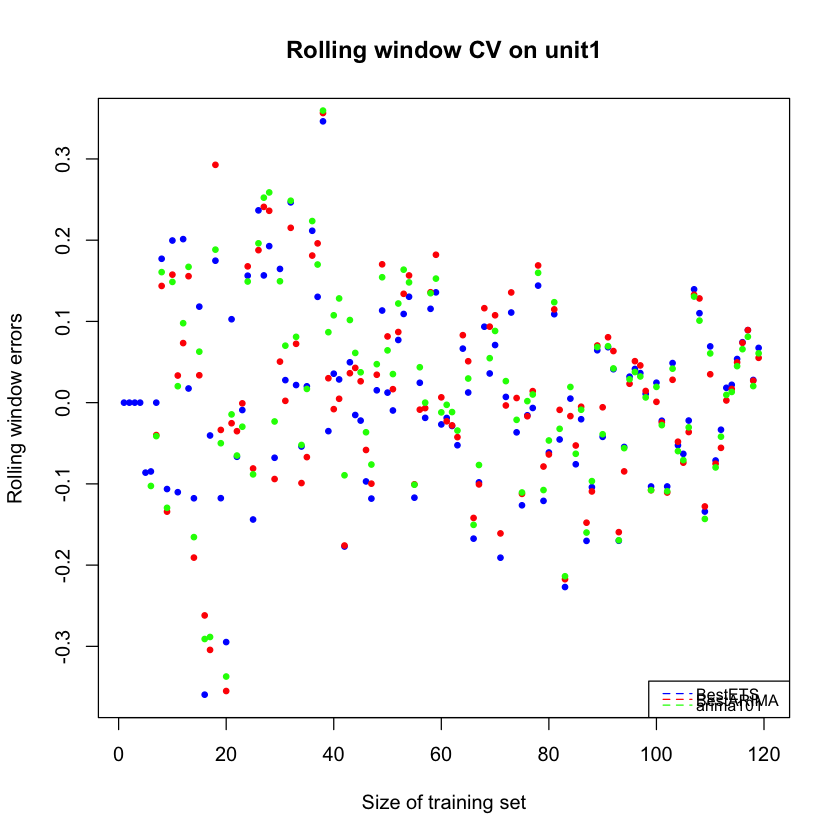

In [25]:
#rolling window 
#compare two arima model to choose the best one 
f.ets.ann<-function(x,h){
  forecast(ets(x,model = "ANN"),h=h)
}

f.ets.arima102<-function(x,h){
  forecast(Arima(x,order =  c(1,0,2)),h=h)
}

f.ets.arima101<-function(x,h){
  forecast(Arima(x,order =  c(1,0,1)),h=h)
}


d=unit1_train
rollCVannerrors=tsCV(d,f.ets.ann,h=1)
rollCVbestarimaerrors=tsCV(d,f.ets.arima102,h=1)
rollCVariarima101=tsCV(d,f.ets.arima101,h=1)

plot(seq(1,length(rollCVannerrors),1),rollCVannerrors,"p",pch=19,col='blue',cex=0.6,main="Rolling window CV on unit1",xlab="Size of training set",ylab="Rolling window errors")
points(seq(1,length(rollCVannerrors),1),rollCVbestarimaerrors,col="red",pch=19,cex=0.6)
points(seq(1,length(rollCVannerrors),1),rollCVariarima101,col="green",pch=19,cex=0.6)
legend('bottomright',c("BestETS","BestARIMA",'arima101'),col=c('blue','red','green'),lty=rep(2,3),x.intersp=0.3,y.intersp=0.3,cex=0.8)


MSE.ann.unit1=mean(rollCVannerrors^2,na.rm = T)
MSE.best.arima.unit1=mean(rollCVbestarimaerrors,na.rm = T)
MSE.arima101.unit1=mean(rollCVariarima101,na.rm = T)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.004229241,0.103078,0.07961508,0.02675277,0.6272576,0.7022437,-0.09779311


For a multivariate timeseries, specify a seriesname for each timeseries. Defaulting to column names.


         Point Forecast   Lo 100   Hi 100
Jan 2018       12.70470 12.67573 12.78738
Feb 2018       12.69935 12.67573 12.71593
Mar 2018       12.70176 12.67573 12.72399
Apr 2018       12.70093 12.67573 12.73437
May 2018       12.70151 12.66633 12.74474
Jun 2018       12.70651 12.67573 12.75512
Jul 2018       12.70677 12.67573 12.76549
Aug 2018       12.70442 12.65501 12.77586
Sep 2018       12.71239 12.67573 12.78624
Oct 2018       12.71121 12.67573 12.79661
Nov 2018       12.70981 12.67573 12.80698
Dec 2018       12.70687 12.61853 12.81736
Jan 2019       12.71935 12.67573 12.82773
Feb 2019       12.71400 12.67573 12.83811
Mar 2019       12.71641 12.67573 12.84848
Apr 2019       12.71558 12.67573 12.85885
May 2019       12.71616 12.66633 12.86923
Jun 2019       12.72116 12.67573 12.87960
Jul 2019       12.72142 12.67573 12.88997
Aug 2019       12.71907 12.65501 12.90035
Sep 2019       12.72704 12.67573 12.91072
Oct 2019       12.72586 12.67573 12.92110
Nov 2019       12.72445 12.67573 1

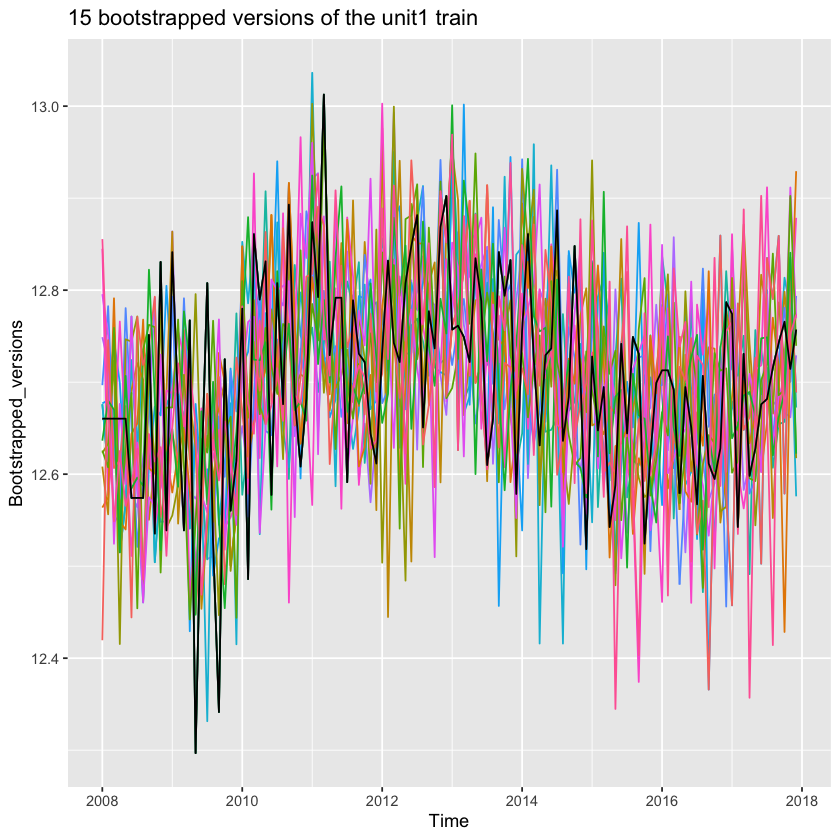

In [27]:
#bagging
bm.unit1=baggedModel(unit1_train,bootstrapped_series = bld.mbb.bootstrap(unit1_train,15,block_size = NULL))
accuracy(forecast(bm.unit1))

bootstrapped_versions=bld.mbb.bootstrap(unit1_train,15)
boot.ts=ts(as.data.frame(bootstrapped_versions),start = c(2008,1),frequency = 12)
autoplot(unit1_train) +
  autolayer(boot.ts, colour=TRUE) +
  autolayer(unit1_train, colour=FALSE)+  ylab("Bootstrapped_versions")+guides(colour="none")+
  ggtitle("15 bootstrapped versions of the unit1 train")

forecast(bm.unit1)